In [54]:
from sklearn import metrics
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pickle
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


from flask import jsonify



In [8]:
df = pd.read_csv('finalModelData.csv')

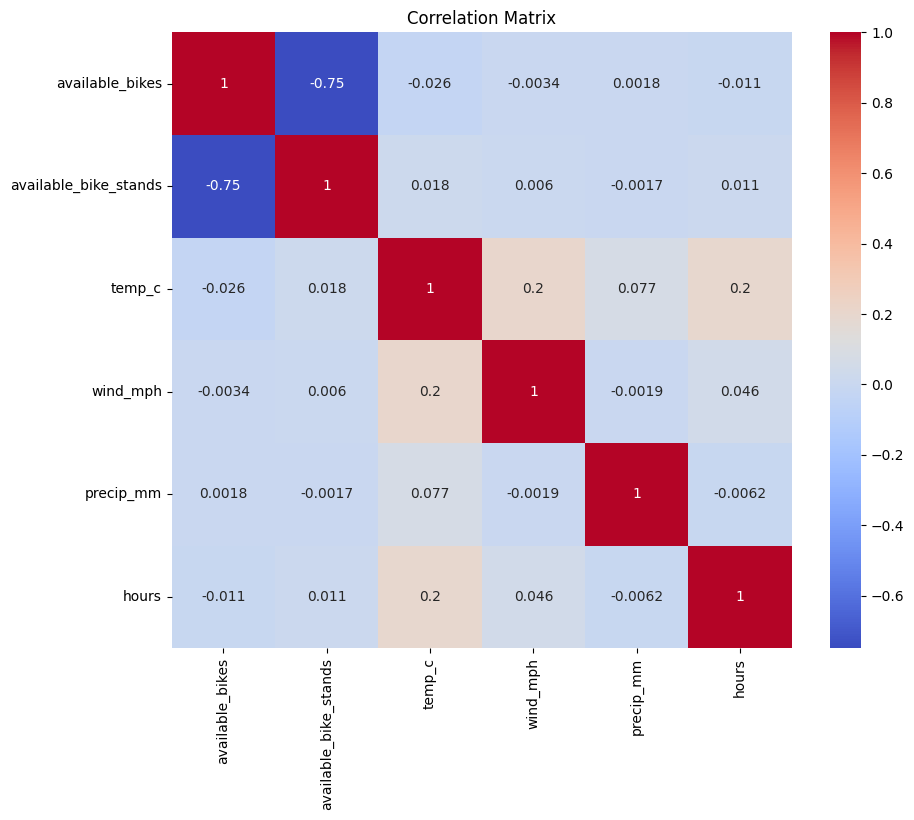

In [9]:
#correlation matrix 
columns_to_correlate = ['available_bikes', 'available_bike_stands', 'temp_c', 'wind_mph', 'precip_mm', 'hours']

corr_matrix = df[columns_to_correlate].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [70]:
stationID = df['number'].unique()
df = df.drop_duplicates()


for station in stationID:
    df_station = df[df['number'] == station]

    #split data 
    X = df_station[['temp_c', 'wind_mph', 'precip_mm', 'hours']]
    Y = df_station[['available_bikes']]

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

    #model 
    model = LinearRegression()
    model.fit(X_train, Y_train)

    predictions = model.predict(X_test)

    print(r2_score(Y_test, predictions))
    
    #save
    filename = f'model_{station}.pkl'
    with open(filename, 'wb') as file:
        pickle.dump(model, file)
    print(f"Model for station {station} saved to {filename}")


0.19616278803207987
Model for station 42 saved to model_42.pkl
0.058330459955920344
Model for station 30 saved to model_30.pkl
0.19879411895252652
Model for station 54 saved to model_54.pkl
0.06937144471422008
Model for station 108 saved to model_108.pkl
0.08213335678079814
Model for station 20 saved to model_20.pkl
0.014984937194338244
Model for station 56 saved to model_56.pkl
0.08153218617995661
Model for station 6 saved to model_6.pkl
0.01300792001764528
Model for station 18 saved to model_18.pkl
0.046652031595254995
Model for station 32 saved to model_32.pkl
0.298326670141255
Model for station 52 saved to model_52.pkl
0.09824306163426522
Model for station 48 saved to model_48.pkl
0.16919634939102535
Model for station 13 saved to model_13.pkl
0.07060230866750516
Model for station 43 saved to model_43.pkl
0.06863805766284714
Model for station 31 saved to model_31.pkl
0.0824065173654478
Model for station 98 saved to model_98.pkl
0.07853233036143525
Model for station 14 saved to model

In [67]:
def predict(stationid, temp_c, wind_mph, precip_mm, hours):

    filename = f'model_{stationid}.pkl' # Replaces {station} with the actual station ID
    with open(filename, 'rb') as file:
        model = pickle.load(file)

    df_prediction = pd.DataFrame({
        'temp_c': [temp_c], 
        'wind_mph': [wind_mph],
        'precip_mm': [precip_mm],
        'hours': [hours] 
    })

    # Predict the number of available bikes
    predicted_bikes = model.predict(df_prediction)
# Convert the NumPy array to a Python list
    # predicted_bikes_list = predicted_bikes.tolist()
    

    return {'avail': predicted_bikes[0]}

In [72]:
results = {}

for station in stationID:
    df_station = df[df['number'] == station]

    #split data 
    X = df_station[['temp_c', 'wind_mph', 'precip_mm', 'hours']]
    Y = df_station[['available_bikes']]

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

    #model 
    model = LinearRegression()
    model.fit(X_train, Y_train)

    predictions = model.predict(X_test)

    r_squared = r2_score(Y_test, predictions)
    results[station] = {
        'r_squared': r_squared,
        'predictions': predictions.tolist()  # Convert predictions to a list for easier manipulation
    }

max_r_squared = max(results.values(), key=lambda x: x['r_squared'])['r_squared']
average_r_squared = sum(result['r_squared'] for result in results.values()) / len(results)

print("Maximum R-squared:", max_r_squared)
print("Average R-squared:", average_r_squared)


Maximum R-squared: 0.298326670141255
Average R-squared: 0.09090055840171303


In [27]:

#This function is used repeatedly to compute all metrics
def printMetrics(testValues, predictionValues):
    print("Number of samples in testValues:", len(testValues))
    print("Number of samples in predictionValues:", len(predictionValues))

    # Step 2: Print the first few elements of testValues and predictionValues to ensure alignment
    print("First few elements of testValues:", testValues[:5])
    print("First few elements of predictionValues:", predictionValues[:5])
    mse = mean_squared_error(testValues, predictionValues)

    # Calculate Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mse)

    # Calculate Mean Absolute Error (MAE)
    mae = mean_absolute_error(testValues, predictionValues)

    # Calculate R-squared
    r_squared = r2_score(testValues, predictionValues)

    # Print the metrics
    print("Mean Squared Error (MSE):", mse)
    print("Root Mean Squared Error (RMSE):", rmse)
    print("Mean Absolute Error (MAE):", mae)
    print("R-squared:", r_squared)

In [28]:
station_to_predict = 1
filename = f'model_{station_to_predict}.pkl'
with open(filename, 'rb') as file: 
    loaded_model = pickle.load(file)


# Make predictions on the training set
train_predictions = loaded_model.predict(X_train)

# Make predictions on the testing set
# Assuming Y_test contains the true target values for the testing set
# You may need to replace Y_test with your actual testing target values
# test_predictions = loaded_model.predict(X_test)
test_predictions = Y_test


# Call the printMetrics function to evaluate the model
printMetrics(test_predictions, train_predictions)


Number of samples in testValues: 3478
Number of samples in predictionValues: 8115
First few elements of testValues: 1136123    15
419809     28
1244927     9
560504      7
870357     23
Name: available_bikes, dtype: int64
First few elements of predictionValues: [13.33560377 15.29379969 10.98062831 12.59263651 15.61537568]


ValueError: Found input variables with inconsistent numbers of samples: [3478, 8115]